In [ ]:
import numpy as np
import pandas as pd
df1 = pd.read_csv('CRIME_DATA_2021.csv')
df1
from sklearn import preprocessing
sti = preprocessing.LabelEncoder()
df = df1.apply(sti.fit_transform)
df
featured_cols = ['CRIME_TYPE', 'LMPD_DIVISION', 'LMPD_BEAT', 'PREMISE_TYPE',
'City', 'ZIP_CODE']
x = df[featured_cols]
y = df.UOR_DESC
x
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
from sklearn.naive_bayes import GaussianNB
rain = GaussianNB()
rain.fit(x_train, y_train)
x_test
y_pred = rain.predict(x_test)
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result
print(len(pd.unique(df['CRIME_TYPE'])))
print(len(pd.unique(df['LMPD_DIVISION'])))
print(len(pd.unique(df['LMPD_BEAT'])))
print(len(pd.unique(df['PREMISE_TYPE'])))
print(len(pd.unique(df['City'])))
print(len(pd.unique(df['ZIP_CODE'])))

<AxesSubplot:>

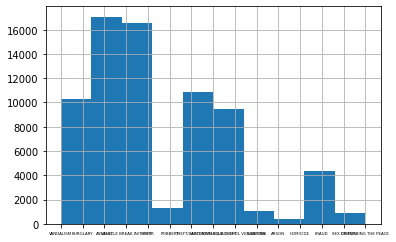

In [ ]:
df1["CRIME_TYPE"].hist(xlabelsize=4,bins=10)

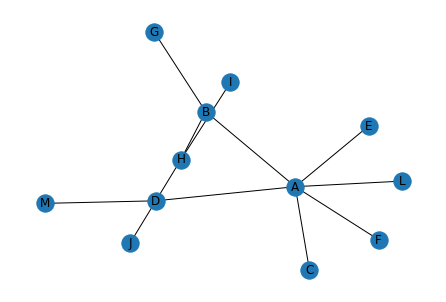

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
g = nx.Graph()
g.add_edge("A","B")
g.add_edge("A","С")
g.add_edge("A","D")
g.add_edge("M","D")
g.add_edge("A","E")
g.add_edge("A","F")
g.add_edge("A","L")
g.add_edge("B","G")
g.add_edge("B","H")
g.add_edge("H","I")
g.add_edge("H","J")
nx.draw(g, with_labels = True)

In [ ]:
nx.density(g)

0.16666666666666666

['A', 'B', 'H', 'D', 'С']

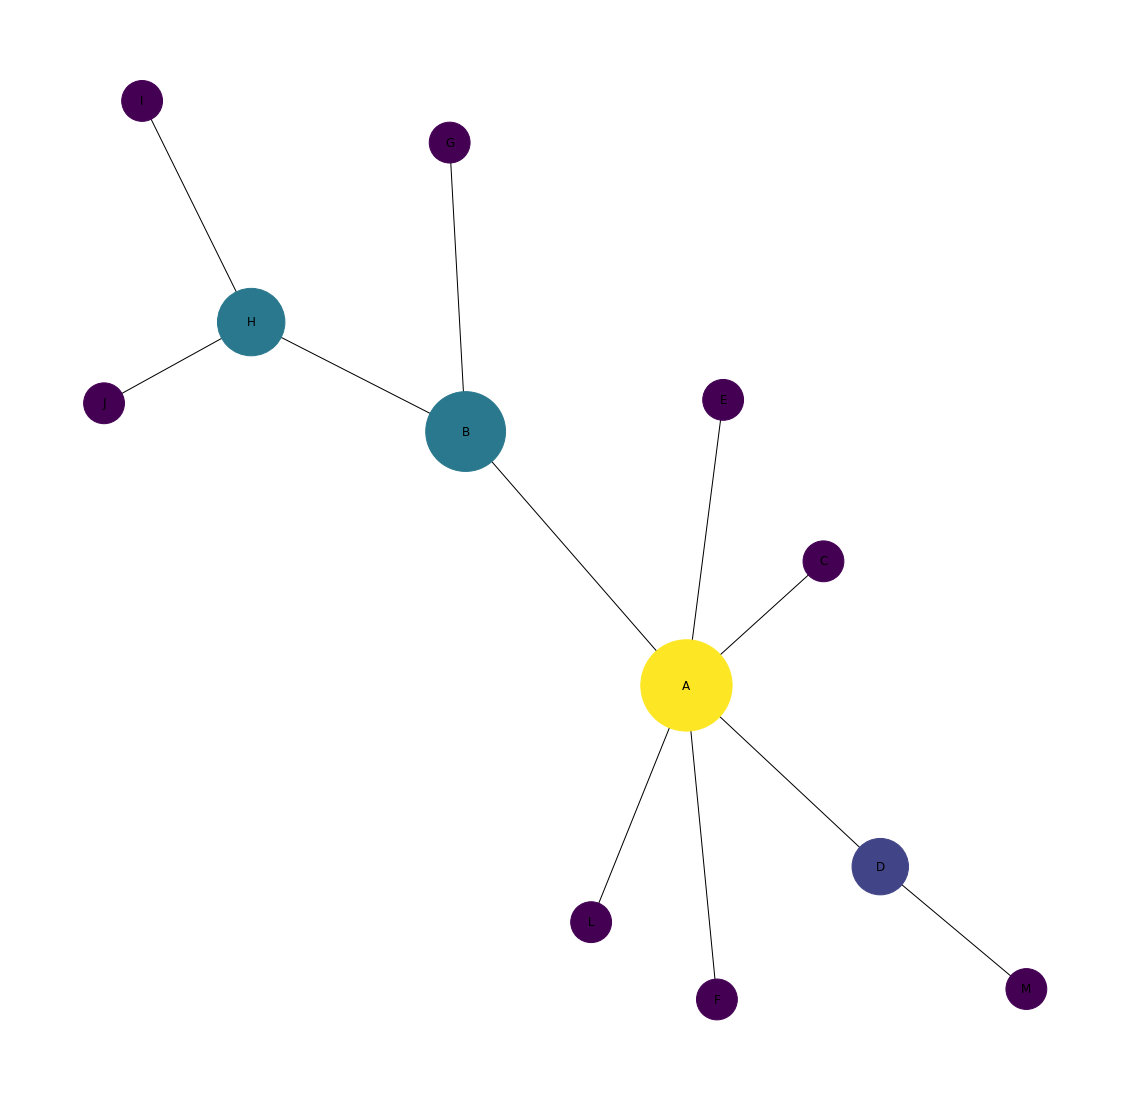

In [ ]:
pos = nx.spring_layout(g)
betCent = nx.betweenness_centrality(g, normalized=True, endpoints=True)
node_color = [20000.0 * g.degree(v) for v in g]
node_size = [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(g, pos=pos, with_labels=True,
                node_color=node_color,
                node_size=node_size )
plt.axis('off')
sorted(betCent, key=betCent.get, reverse=True)[:5]

In [ ]:
neigh=["A","B","C","D","E","F","G","H","I","J","K","L","M"]
for i in range(len(neigh)):
  all_neighbors=list(nx.classes.function.all_neighbors(g,neigh[i]))
  print("All neighbors for Node", str(neigh[i]),"--->",str(all_neighbors))

In [ ]:
def encode_class(df1):
    classes = []
    for i in range(len(df1)):
        if df1[i][-1] not in classes:
            classes.append(df1[i][-1])
    for i in range(len(classes)):
        for j in range(len(df1)):
            if df1[j][-1] == classes[i]:
                df1[j][-1] = i
    return df1

In [ ]:
def splitting(df1, ratio):
    train_num = int(len(df1) * ratio)
    train = []
    # initially testset will have all the dataset
    test = list(df1)
    while len(train) < train_num:
        # index generated randomly from range 0
        # to length of testset
        index = random.randrange(len(test))
        # from testset, pop data rows and put it in train
        train.append(test.pop(index))
    return train, test

In [ ]:
def groupUnderClass(df1):
      dict = {}
      for i in range(len(df1)):
          if (df1[i][-1] not in dict):
              dict[df1[i][-1]] = []
          dict[df1[i][-1]].append(df1[i])
      return dict

In [ ]:
def mean(numbers):
    return sum(numbers) / float(len(numbers))

In [ ]:
def std_dev(numbers):
    avg = mean(numbers)
    variance = sum([pow(x - avg, 2) for x in numbers]) / float(len(numbers) - 1)
    return math.sqrt(variance)

In [ ]:
def MeanAndStdDev(df1):
    info = [(mean(attribute), std_dev(attribute)) for attribute in zip(*df1)]
    del info[-1]
    return info

In [ ]:
def MeanAndStdDevForClass(df1):
    info = {}
    dict = groupUnderClass(df1)
    for classValue, instances in dict.items():
        info[classValue] = MeanAndStdDev(instances)
    return info

In [ ]:
def calculateGaussianProbability(x, mean, stdev):
    expo = math.exp(-(math.pow(x - mean, 2) / (2 * math.pow(stdev, 2))))
    return (1 / (math.sqrt(2 * math.pi) * stdev)) * expo

In [ ]:
def calculateClassProbabilities(info, test):
    probabilities = {}
    for classValue, classSummaries in info.items():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, std_dev = classSummaries[i]
            x = test[i]
            probabilities[classValue] *= calculateGaussianProbability(x, mean, std_dev)
    return probabilities

In [ ]:
def predict(info, test):
    probabilities = calculateClassProbabilities(info, test)
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilities.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
    return bestLabel

In [ ]:
def getPredictions(info, test):
    predictions = []
    for i in range(len(test)):
        result = predict(info, test[i])
        predictions.append(result)
    return predictions

In [ ]:
def accuracy_rate(test, predictions):
    correct = 0
    for i in range(len(test)):
        if test[i][-1] == predictions[i]:
            correct += 1
    return (correct / float(len(test))) * 100.0
